## Faça Você Mesmo

In [1]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import statistics  as sts
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Leitura do arquivo
df = pd.read_csv("../dados/tempo.csv", sep=";")

# Visualizar o dataset
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
# Verificar o tamanho do dataset
print(f'O arquivo tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

O arquivo tem 14 linhas e 5 colunas.


In [4]:
# Verificar quantidade e tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes


In [5]:
# Verificar se existem dados nulos ou ausentes
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [6]:
# Analisar a coluna 'Vento'
agrupado_vento = df.groupby(['Vento']).size()
agrupado_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [7]:
# Preencher NaN na coluna 'Vento' por FALSO
df['Vento'].fillna('FALSO', inplace=True)

In [8]:
# Verificar novamente se existem dados nulos ou ausentes
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          0
Jogar          0
dtype: int64

In [9]:
# Analisar a coluna 'Aparencia'
agrupado_aparencia = df.groupby(['Aparencia']).size()
agrupado_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [10]:
# Substituir registros em 'Aparencia' fora de domínio
df.loc[df['Aparencia'] ==  'menos', 'Aparencia'] = "sol"

In [11]:
# Verificar se foram substituídos registors fora de domínio
agrupado_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [12]:
# Resumo estatístico das colunas numéricas
df.describe()

,Temperatura,Umidade
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


In [13]:
# Verificar as temperaturas fora de domínio (entre -130 e 130)
df.loc[(df['Temperatura'] < -130) | (df['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [14]:
# Mediana da coluna 'Temperatura'
mediana_temperatura = sts.median(df['Temperatura'])
mediana_temperatura

73.5

In [15]:
# Substituir as temperaturas fora de domínio pela mediana e checar novamente as temperaturas
df.loc[(df['Temperatura'] < -130) | (df['Temperatura'] > 130)] = mediana_temperatura
df.loc[(df['Temperatura'] < -130) | (df['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [16]:
# Verificar as umidades fora de domínio (entre 0 e 100)
df.loc[(df['Umidade'] <  0 )  | ( df['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [17]:
# Mediana da coluna 'Umidade'
mediana_umidade = sts.median(df['Umidade'])
mediana_umidade

82.5

In [18]:
# Substituir as umidades fora de domínio pela mediana e checar novamente as temperaturas
df.loc[(df['Umidade'] < 0) | (df['Umidade'] > 100)] = mediana_umidade
df.loc[(df['Umidade'] < 0) | (df['Umidade'] > 100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [19]:
# Verificar se existem dados nulos ou ausentes
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          0
Jogar          0
dtype: int64

In [20]:
# Preencher os registros NaN da coluna 'Umidade' também pela mediana e verificar novamente os dados ausentes ou nulos
df['Umidade'].fillna(mediana_umidade, inplace=True)
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

<Axes: xlabel='Vento'>

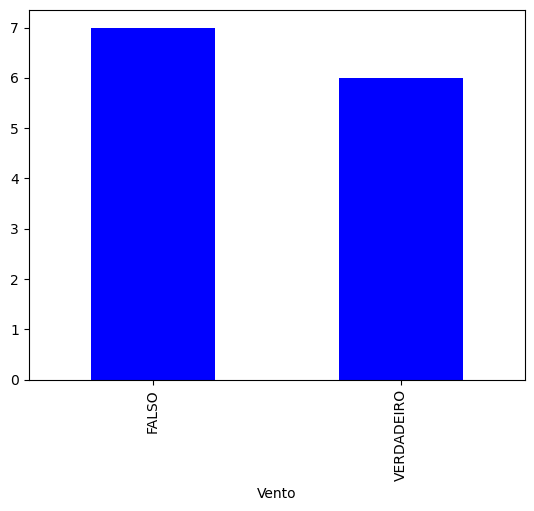

In [21]:
agrupado_vento.plot.bar(color='blue')

<Axes: xlabel='Aparencia'>

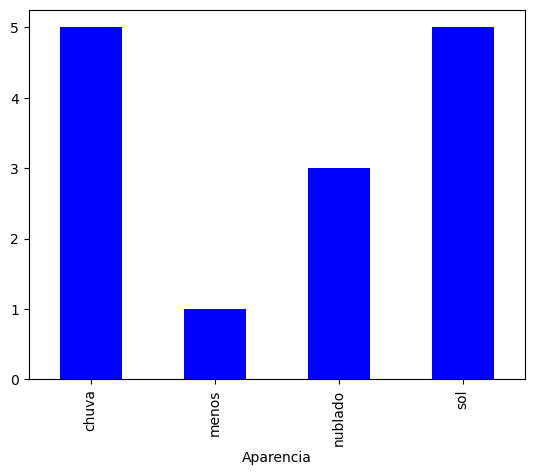

In [22]:
agrupado_aparencia.plot.bar(color='blue')

Text(0.5, 1.0, 'Temperatura')

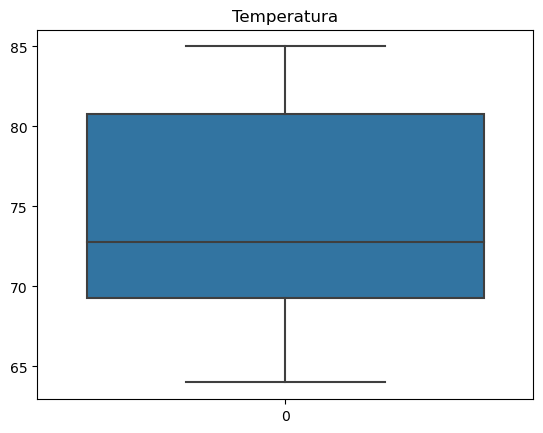

In [23]:
sns.boxplot(df['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

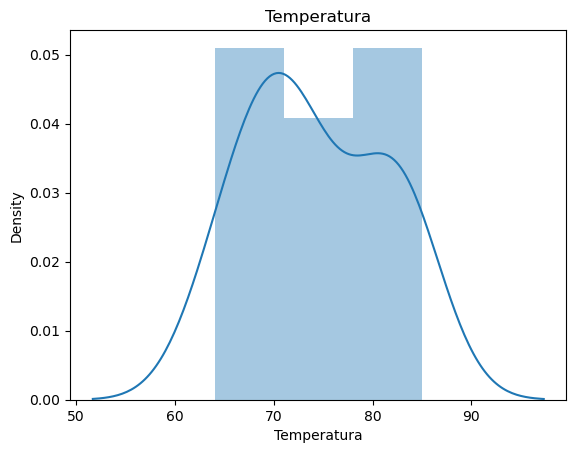

In [24]:
sns.distplot(df['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Umidade')

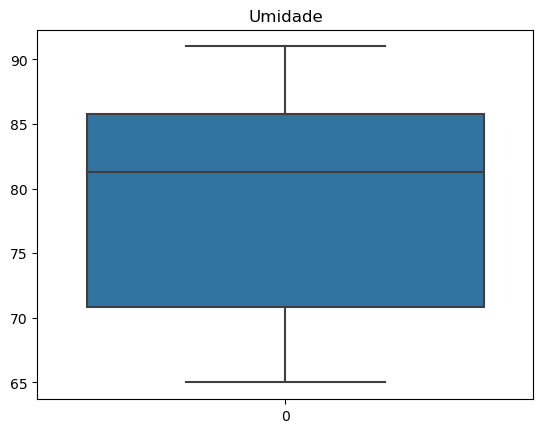

In [25]:
sns.boxplot(df['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

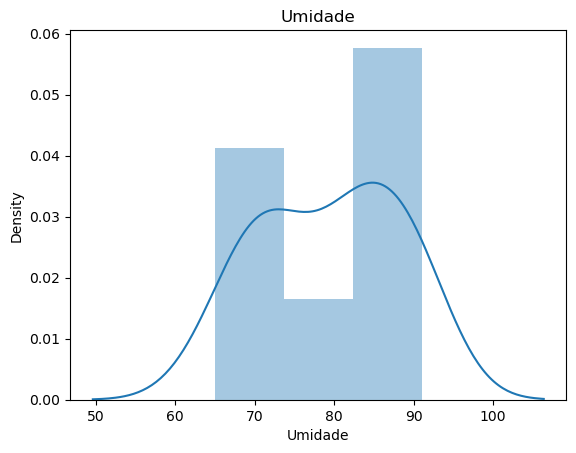

In [26]:
sns.distplot(df['Umidade']).set_title('Umidade')